ご質問ありがとうございます。時系列分析、特に統計検定準1級レベルのトピックは、数式と実装（コード）を両輪で学ぶのが一番の近道です。

まず、最初の具体的なご要望である「ACF（自己相関係数）の値によって時系列データがどう動くか」について、コードとグラフで視覚化してみましょう。

### 🧐 ACFと時系列の動き

ご質問に「偏自己回帰係数（ACF）」とありましたが、一般的に：

  * **ACF** (AutoCorrelation Function) = **自己相関係数**
  * **PACF** (Partial AutoCorrelation Function) = **偏自己相関係数**

と呼びます。

おそらく、「\*\*ラグ1の自己相関係数（ACF）\*\*が特定の値（-1から+1）のときに、データがどう動くか見たい」というご要望かと存じます。

これをシミュレーションする最も簡単なモデルが **AR(1)モデル** です。

**AR(1)モデル:**
$Y_t = \phi Y_{t-1} + \epsilon_t$

このモデルは「現在の値（$Y_t$）は、1期前の値（$Y_{t-1}$）に係数 $\phi$ を掛けたものに、ランダムなノイズ（$\epsilon_t$）を加えたもの」というモデルです。

定常な（平均や分散が時間によって変動しない）AR(1)モデルでは、**ラグ1の自己相関係数（$\rho_1$）は $\phi$ と一致**します。

したがって、この係数 $\phi$ を -1 から +1 の範囲で変えてデータを生成することで、ご要望のシミュレーションができます。

### 🐍 Pythonによるシミュレーションコード

AR(1)モデルの係数 $\phi$（= ラグ1のACF）をいくつか変えて、時系列データを生成し、プロットするコードです。`statsmodels`ライブラリを使用します。



findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'TakaoPGothic' not found.
findfont:

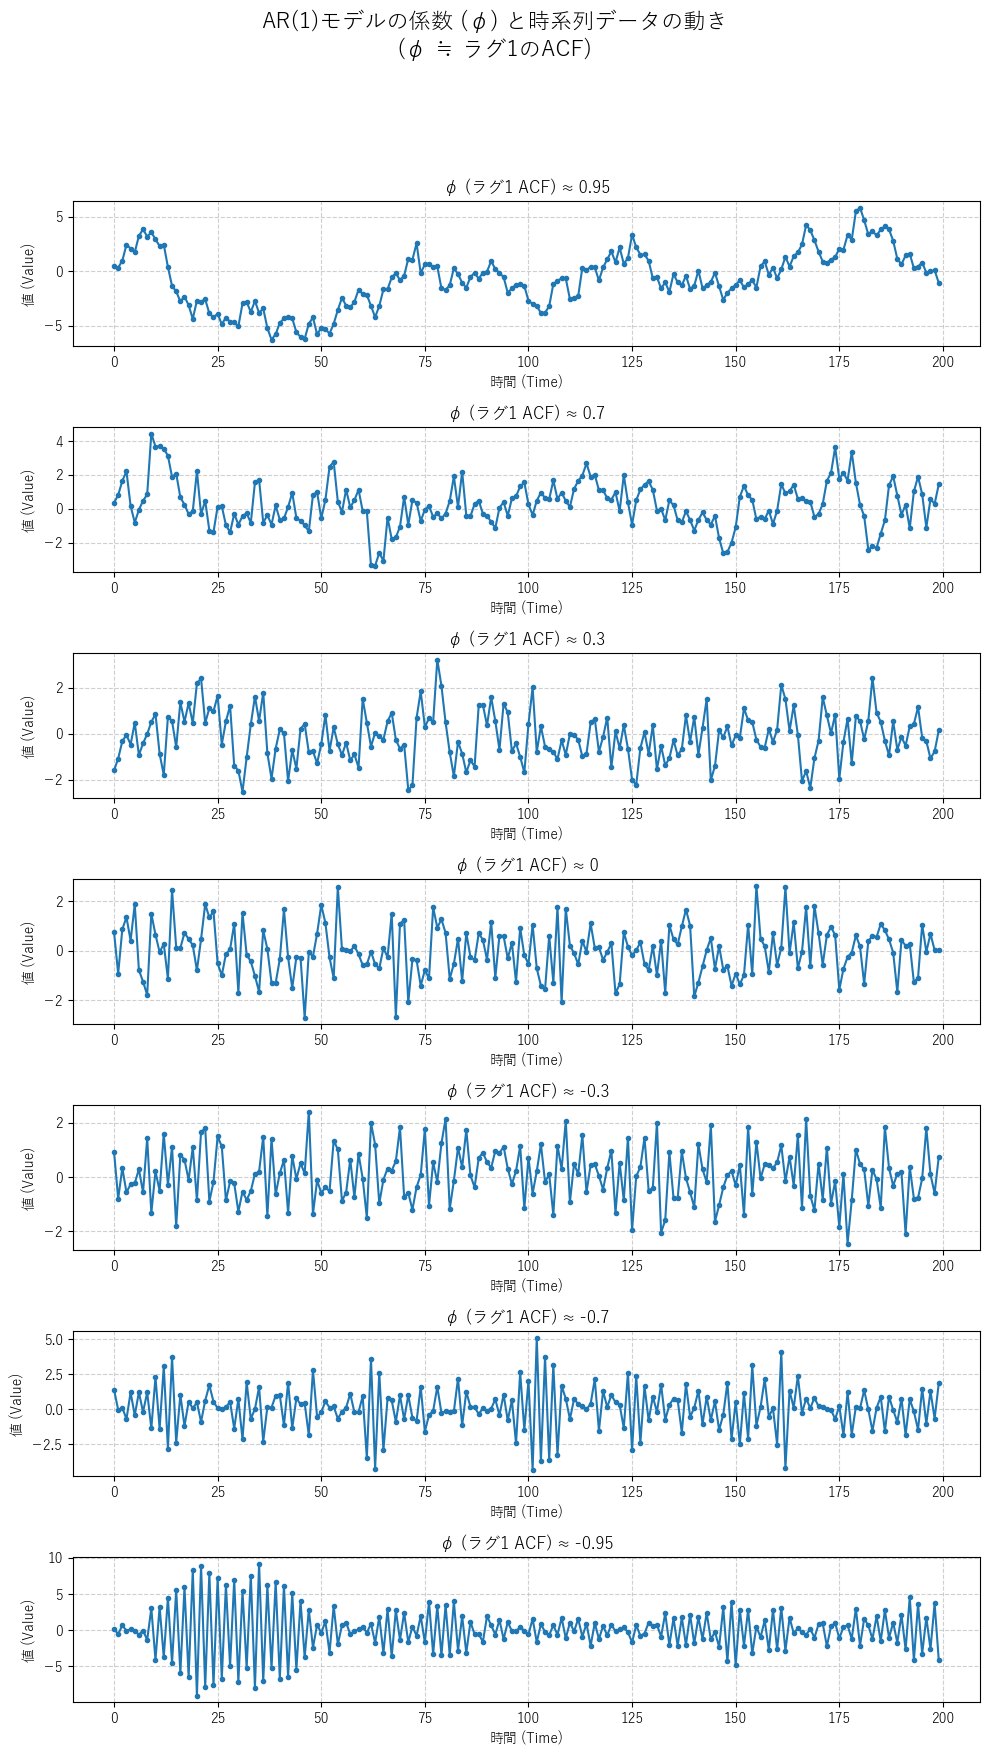

In [1]:

import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm

from statsmodels.tsa.arima_process import ArmaProcess



# グラフのスタイル設定

# （日本語環境に合わせてフォントを設定）

plt.rcParams['figure.figsize'] = (10, 15)

try:

    # 一般的な日本語フォントを指定

    plt.rcParams['font.family'] = ['Hiragino Sans', 'Yu Gothic', 'Meiryo', 'TakaoPGothic', 'Noto Sans CJK JP', 'sans-serif']

except Exception as e:

    print(f"日本語フォントの設定エラー: {e}")

    plt.rcParams['font.family'] = 'sans-serif' # フォールバック



# シミュレーションのパラメータ

n_samples = 200 # 生成するデータ点数

np.random.seed(42) # 再現性のためのシード固定



# 比較するAR(1)係数（φ）

# ユーザーの要望に近い代表的な値（-1, +1は非定常のため避ける）

phis = [0.95, 0.7, 0.3, 0, -0.3, -0.7, -0.95]

n_plots = len(phis)



fig, axes = plt.subplots(n_plots, 1, figsize=(10, 2.5 * n_plots))

fig.suptitle('AR(1)モデルの係数 (φ) と時系列データの動き\n(φ ≒ ラグ1のACF)', fontsize=16, y=1.03)



for i, phi in enumerate(phis):

    # AR(1)モデルの定義： Y_t = phi * Y_{t-1} + epsilon_t

    # ArmaProcessではar係数を [1, -phi_1, -phi_2, ...] の形で渡す

    ar_params = np.array([1, -phi])

    ma_params = np.array([1]) # MA項はなし (MA(0))

    

    # 定常AR(1)プロセスを定義

    ar_process = ArmaProcess(ar_params, ma_params)

    

    # データを生成

    y = ar_process.generate_sample(nsample=n_samples)

    

    # グラフ描画

    ax = axes[i]

    ax.plot(y, marker='o', markersize=3, linestyle='-')

    ax.set_title(f'φ (ラグ1 ACF) ≈ {phi}')

    ax.set_xlabel('時間 (Time)')

    ax.set_ylabel('値 (Value)')

    ax.grid(True, linestyle='--', alpha=0.6)



plt.tight_layout(rect=[0, 0.03, 1, 0.98])



# 画像を保存

plt.savefig('ar1_simulation_plots.png')




`
### 📊 実行結果と解釈

以下が、上記のコードで生成されたグラフです。

グラフから以下の傾向が読み取れます。

  * **φ ≈ +0.95 (強い正の相関):**

      * データは非常に滑らかに動きます。**現在の値は、直前の値と非常に近い値**を取ろうとします（トレンドのように見える）。これは「**持続性**」が非常に強い状態です。

  * **φ ≈ +0.7, +0.3 (正の相関):**

      * $\phi$ が小さくなるにつれて、データの滑らかさが減り、ランダムな動き（ギザギザ）が大きくなります。

  * **φ = 0 (無相関):**

      * $Y_t = \epsilon_t$ となり、データは単なるランダムノイズ（**ホワイトノイズ**）となります。過去の値は未来の値に全く影響を与えません。

  * **φ ≈ -0.3, -0.7 (負の相関):**

      * データは**振動**し始めます。正の値の次には負の値、負の値の次には正の値が出やすくなります。

  * **φ ≈ -0.95 (強い負の相関):**

      * データは**激しく振動**します。**直前の値とほぼ逆の値**を取ろうとします（例：+1の次は-1、その次は+1...）。




時系列データのグラフとACF（自己相関係数）のグラフを見てペアリングする問題は、時系列分析の理解度を測る定番問題です。

着目すべき視点は、大きく分けて以下の3パターンです。

### 📈 ペアリングのための3つの視点

1.  **グラフが「滑らか」か？（持続性）**
    * **グラフの動き:** 非常に滑らかで、前の値と近い値をとりながらゆっくり動いている（トレンドのように見える）。
    * **ACFの特徴:** ラグ1のACF ($\rho_1$) が**+1に近い大きな正の値**（例: 0.9）になります。
    * **ACFの形:** ACF全体が、**ゆっくりと指数関数的に0に向かって減衰**していきます。ラグが離れても相関がなかなか切れません。

2.  **グラフが「ギザギザ」か？（ランダム性）**
    * **グラフの動き:** 規則性がなく、ランダムに上下している。
    * **ACFの特徴:** ラグ1のACF ($\rho_1$) が**0に近い値**（例: 0, 0.1, -0.1）になります。
    * **ACFの形:** ACFはラグ1からすぐに0に落ちます（または、全てのラグで0に近い）。これは「ホワイトノイズ（ただのノイズ）」に近い状態です。

3.  **グラフが「激しく振動」しているか？（周期的振動）**
    * **グラフの動き:** プラスとマイナスを交互に繰り返すように、激しく振動している。
    * **ACFの特徴:** ラグ1のACF ($\rho_1$) が**-1に近い大きな負の値**（例: -0.9）になります。
    * **ACFの形:** ACFが**プラスとマイナスを交互に繰り返しながら（振動しながら）0に減衰**していきます。

---

### 🧠 まとめ（思考プロセス）

実際の試験では、以下のように考えると素早くペアリングできます。

1.  まず、時系列グラフを見て、**「滑らか」「ランダム」「振動」**の3つのうちどれに当てはまるか、おおまかに分類します。
2.  次に、ACFのグラフ（通常は棒グラフで示されます）を見ます。
    * **「滑らか」**なグラフ $\rightarrow$ ACFが**ゆっくり正で減衰**しているものを選びます。
    * **「ランダム」**なグラフ $\rightarrow$ ACFが**すぐに0**になっているものを選びます。
    * **「振動」**するグラフ $\rightarrow$ ACFが**プラス・マイナスを交互に繰り返している**ものを選びます。

今回のAR(1)モデルは、この「ラグ1のACF（$\phi$）」がデータ全体の動きを決定づけるという点で、最も基本的なモデルと言えます。

---

ご提示いただいた残りのトピック（AR(p), MA(q), ARMA, ARIMAなど）に進みますか？
もしよろしければ、次に「**AR(p)モデルとPACF（偏自己相関係数）**」の関係について解説するのはいかがでしょうか？モデルの次数（p）を決定するのに非常に重要な概念です。